In [1]:
import sys, os
sys.path.insert(0, os.path.abspath("../src"))
import aklab_imaging.imaging_tools as it
from aklab_imaging.spectrometer import Spectrometer
import aklab_imaging.data_view as dv

In [2]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
import plotly.io as pio
pio.renderers.default = "notebook"

In [4]:
spectrometer = Spectrometer()

Initializing spectrometer
THR640: getting config over Serial Port
Spectrometer: camera and motor connected, yay!


In [5]:
importlib.reload(it)
ms = it.Imaging(spectrometer)

In [6]:
#ms.capture_series(ex=500,frames=3)

In [8]:
#spectrometer.get_position()
# 450k - Ne lines
# 1000 ~ 300 pixels
# - 1000 ~ +300 pixels
positions = {
    'hgamma':int(632.4*1e3),
    'hbeta':int(584*1e3),
    'halpha':int(399.5*1e3),
}
#spectrometer.grating_motor.goto(int(632.4*1000))

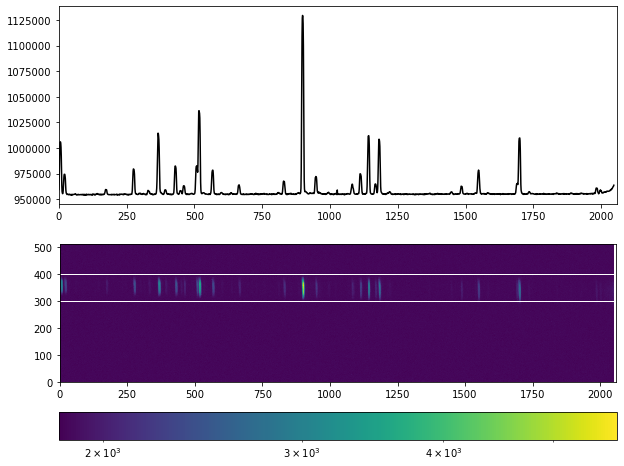

In [53]:
ms.set_image_name(name='ThAr', suffix='slit_50u')
ms.capture_image(ex=20000)
ms.plot_image()

In [54]:
ms.image.max()

5693

In [8]:
#ms.plot_image()
#plt.savefig('example.png',dpi=200,bbox_inches='tight')

In [62]:
ms.set_basepath('../data')
ms.save_image()

Image already saved as ../data\ThAr-632400-20000ms-slit_50u-000.nc.


In [61]:
#ms.plot_spectrum(limits=[300,360],zero=109000)
spectrum = dv.image_to_spectrum(ms.image,limits=[320,370])
spectrum = spectrum - spectrum.min() - 280.
pixels = np.arange(spectrum.shape[0])
fig = dv.plot_spectrum(spectrum,x=pixels)
#hgamma = dv.fit_single_gaussian(pixels,spectrum,[1013,1040],name=r'Hgamma fit',fig=fig)
#dgamma = dv.fit_single_gaussian(pixels,spectrum,[1040,1060],name=r'Dgamma fit',fig=fig)
thar= dv.fit_single_gaussian(pixels,spectrum,[820,836],name=r'Dgamma fit',fig=fig)
thar1= dv.fit_single_gaussian(pixels,spectrum,[890,910],name=r'Dgamma fit',fig=fig)
thar1= dv.fit_single_gaussian(pixels,spectrum,[1540,1560],name=r'Dgamma fit',fig=fig)
fig.show()

Dgamma fit center = 830.080 fwhm = 6.882
Dgamma fit center = 899.451 fwhm = 6.752
Dgamma fit center = 1547.906 fwhm = 6.969


In [54]:
#coeff = [-2.76244673e-07, -5.33068727e-03,  4.39841180e+02]
#coeff = [-5.83803274e-03,  4.40046165e+02]
# coeff = [-6.00353179e-03,  4.40231098e+02] # H-gamma and D-gamma only
coeff = [-5.96078426e-03,  4.40186628e+02] # Balmer + one Hg
poly = np.poly1d(coeff)
pixels = np.arange(spectrum.shape[0])
#lam = pixtolam(pixels)
lam = poly(pixels)
fig = dv.plot_spectrum(spectrum,x=lam)

#dgamma = dv.fit_single_gaussian(lam,spectrum,[433.8,434],name=r'Dg fit',fig=fig)
hgamma = dv.fit_single_gaussian(lam,spectrum,[434,434.15],name=r'Hgamma fit',fig=fig)
#hg1 = dv.fit_single_gaussian(lam,spectrum,[435.8,435.9],name=r'Hgamma fit',fig=fig)
fig.show()


Hgamma fit center = 434.066 fwhm = 0.051


In [18]:
ms.plotly_plot(ms.image-1700.)